In [ ]:
# Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
# Loading the Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [ ]:
test

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39058,ID97651,0.047982,0.15,0.740385,C2,27003,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
39059,ID97652,1.224838,0.05,0.509615,C8,8794,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
39060,ID97653,0.520287,0.12,0.355769,C6,13051,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0
39061,ID97654,1.172391,0.08,0.644231,C5,34738,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2


In [ ]:
# Dropping the Policy ID
test = test.drop('policy_id',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
train = train.drop('policy_id', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
train

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [ ]:
# Feature Engineering
train['max_torque'] = train['max_torque'].apply(lambda x: x.split('@')[1][:-3])
train['max_power'] = train['max_power'].apply(lambda x: x.split('@')[1][:-3])
test['max_torque'] = test['max_torque'].apply(lambda x: x.split('@')[1][:-3])
test['max_power'] = test['max_power'].apply(lambda x: x.split('@')[1][:-3])

In [ ]:
# Converting to numeric value
train['max_torque'] = pd.to_numeric(train['max_torque'])
train['max_power'] = pd.to_numeric(train['max_power'])
test['max_torque'] = pd.to_numeric(test['max_torque'])
test['max_power'] = pd.to_numeric(test['max_power'])

In [ ]:
# Selecting the Object type data
train_object = train.select_dtypes('object').columns

In [ ]:
# Encoder for converting Categorical Values to Numeric Values
enco = LabelEncoder()

for i in train.select_dtypes('object'):
    train[i] = enco.fit_transform(train[i])

for i in test.select_dtypes('object'):
    test[i] = enco.fit_transform(test[i])

In [ ]:
test

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.341732,0.00,0.586538,15,4076,1,0,0,0,3500,...,0,0,0,0,1,0,0,0,1,0
1,0.307241,0.13,0.442308,20,8794,1,2,7,2,4400,...,0,1,1,1,1,1,1,1,1,2
2,0.327924,0.12,0.451923,20,8794,2,0,4,2,4250,...,0,0,1,1,1,0,1,1,1,2
3,0.782654,0.01,0.461538,17,34738,1,0,0,0,3500,...,0,0,0,0,1,0,0,0,1,0
4,1.233404,0.02,0.634615,17,34738,1,0,0,0,3500,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39058,0.047982,0.15,0.740385,11,27003,1,2,7,2,4400,...,0,1,1,1,1,1,1,1,1,2
39059,1.224838,0.05,0.509615,20,8794,3,4,5,1,2750,...,1,1,1,1,1,1,0,1,1,3
39060,0.520287,0.12,0.355769,18,13051,1,2,8,2,4400,...,1,1,1,1,1,1,1,1,1,0
39061,1.172391,0.08,0.644231,17,34738,1,3,3,2,4400,...,1,1,1,1,1,1,1,1,1,2


In [ ]:
train

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,3500,...,0,0,0,1,0,0,0,1,0,0
1,0.672619,0.02,0.375000,11,27003,1,0,0,0,3500,...,0,0,0,1,0,0,0,1,0,0
2,0.841110,0.02,0.384615,15,4076,1,0,0,0,3500,...,0,0,0,1,0,0,0,1,0,0
3,0.900277,0.11,0.432692,16,21622,1,3,3,2,4400,...,1,1,1,1,1,1,1,1,2,0
4,0.596403,0.11,0.634615,17,34738,2,0,4,2,4250,...,0,1,1,1,0,1,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,20,8794,2,0,4,2,4250,...,0,1,1,1,0,1,1,1,2,0
58588,1.199642,0.02,0.519231,5,7788,1,0,0,0,3500,...,0,0,0,1,0,0,0,1,0,0
58589,1.162273,0.05,0.451923,17,34738,1,0,0,0,3500,...,0,0,0,1,0,0,0,1,0,0
58590,1.236307,0.14,0.557692,20,8794,1,2,7,2,4400,...,1,1,1,1,1,1,1,1,2,0


In [ ]:
# Sampling the Data
sum(train['is_claim'] == 0)

54844

In [ ]:
train_1 = train[train['is_claim']==1]

In [ ]:
train1 = train[train['is_claim']==0].sample(3748)

In [ ]:
train1.shape

(3748, 43)

In [ ]:
test.shape

(39063, 42)

In [ ]:
train1 = pd.concat([train1, train_1])

In [ ]:
# Splitting Data into Target Label and Features
y = train1['is_claim']

In [ ]:
X = train1.drop('is_claim',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
X

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
41635,0.080364,0.09,0.336538,19,6112,1,5,1,0,3000,...,0,0,0,0,0,0,0,0,1,0
24568,1.011381,0.09,0.586538,20,8794,1,2,8,2,4400,...,1,1,1,1,1,1,1,1,1,0
57861,0.002811,0.04,0.336538,10,27742,1,2,7,2,4400,...,0,1,1,1,1,1,1,1,1,2
9114,0.041192,0.00,0.365385,1,73430,1,0,0,0,3500,...,0,0,0,0,1,0,0,0,1,0
15942,0.568725,0.11,0.365385,20,8794,1,0,0,0,3500,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58559,0.484333,0.12,0.596154,20,8794,1,2,8,2,4400,...,1,1,1,1,1,1,1,1,1,0
58567,1.148102,0.04,0.451923,3,34791,3,4,5,1,2750,...,1,1,1,1,1,1,0,1,1,3
58573,0.151652,0.00,0.365385,0,4990,1,0,0,0,3500,...,0,0,0,0,1,0,0,0,1,0
58574,0.278499,0.07,0.557692,4,5410,3,4,5,1,2750,...,1,1,1,1,1,1,0,1,1,3


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7496 entries, 41635 to 58581
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     7496 non-null   float64
 1   age_of_car                        7496 non-null   float64
 2   age_of_policyholder               7496 non-null   float64
 3   area_cluster                      7496 non-null   int64  
 4   population_density                7496 non-null   int64  
 5   make                              7496 non-null   int64  
 6   segment                           7496 non-null   int64  
 7   model                             7496 non-null   int64  
 8   fuel_type                         7496 non-null   int64  
 9   max_torque                        7496 non-null   int64  
 10  max_power                         7496 non-null   int64  
 11  engine_type                       7496 non-null   int64  
 12  a

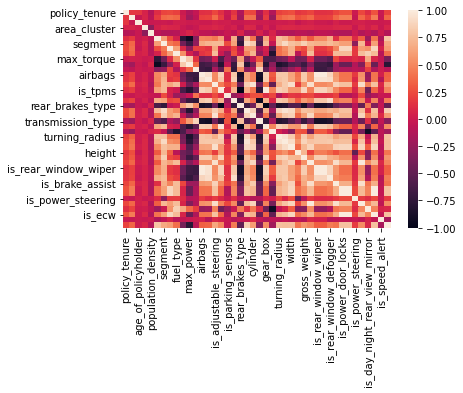

In [ ]:
# Heatmap of Features
sns.heatmap(X.corr())

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 45)

In [ ]:
# Getting the Policy ID Column for Submission
test1 = pd.read_csv('test.csv')
ID = test1['policy_id']

In [ ]:
# Model Building for XGBoost
xmodel = xgb.XGBClassifier()
xmodel.fit(X_train, y_train)

XGBClassifier()

In [ ]:
xpred = xmodel.predict(X_test)

In [ ]:
f1_score(y_test, xpred)

0.6512226512226512

In [ ]:
xmodel_pred = xmodel.predict(test)

In [ ]:
data = {'policy_id':ID, 'is_claim' : xmodel_pred}
df = pd.DataFrame(data)
df.to_csv('xmodel_pred.csv', index = False)

In [ ]:
# Model using RandomizedSearchCV
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
# Initiating the Model
xgb1 = xgb.XGBClassifier(n_estimators=600, objective='binary:logistic', nthread=1)
clf = RandomizedSearchCV(xgb1, params, scoring = 'f1')
clf.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(n_estimators=600, nthread=1),
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='f1')

In [ ]:
# Getting the Best Estimator from RandomizedSearchCV
best_estimator1 = clf.best_estimator_

In [ ]:
best_estimator1

XGBClassifier(colsample_bytree=0.8, gamma=2, min_child_weight=10,
              n_estimators=600, nthread=1, subsample=1.0)

In [ ]:
# Best Score for the Fitted Data
clf.best_score_

0.6257237810080223

In [ ]:
best_cv = best_estimator1.predict(test)

In [ ]:
# Prediction For Submission
data = {'policy_id':ID, 'is_claim' : best_cv}
df = pd.DataFrame(data)
df.to_csv('best_cv.csv', index = False)